## Application of general regression neural network in identifying interfacial parameters under mixed-mode fracture


In [1]:
import os
os.getcwd()

'C:\\Users\\Dell'

In [2]:
os.chdir("D:\\1.sem7\BTP S\\btp after msem\\codes")

In [3]:
os.getcwd()

'D:\\1.sem7\\BTP S\\btp after msem\\codes'

In [4]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


### GRNN :

In [5]:
class GRNN:
    def __init__(self, sigma):
        self.sigma = sigma  # Smoothing factor
        self.X_train = None
        self.Y_train = None

    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X):
        # Euclidean distances
        distances = np.linalg.norm(X[:, np.newaxis] - self.X_train, axis=2)

        # kernel calculation
        kernel = np.exp(-distances ** 2 / (2 * self.sigma ** 2))

        # Predicting output for each parameter
        predicted = np.zeros((X.shape[0], self.Y_train.shape[1]))

        for i in range(self.Y_train.shape[1]):
            predicted[:, i] = np.dot(kernel, self.Y_train[:, i]) / np.sum(kernel, axis=1)

        return predicted


In [6]:
# Loading interfacial parameters
params_file_path = 'D:\\1.sem7\\BTP S\\btp after msem\\data set rps\\Interfacial parameters 10samp data.xlsx'
interfacial_params = pd.read_excel(params_file_path, header=0).iloc[:, 1:].values

interfacial_params = interfacial_params.astype(float)
print(interfacial_params)


[[1.60e+02 2.40e-02 8.00e-02 8.00e+01 1.20e+08 1.20e+08 1.00e+08]
 [1.80e+02 2.70e-02 9.00e-02 9.00e+01 1.35e+08 1.35e+08 1.00e+08]
 [2.20e+02 3.30e-02 1.10e-01 1.10e+02 1.65e+08 1.65e+08 1.00e+08]
 [2.40e+02 3.60e-02 1.20e-01 1.20e+02 1.80e+08 1.80e+08 1.00e+08]
 [1.60e+02 2.70e-02 8.00e-02 8.00e+01 1.20e+08 1.20e+08 1.00e+08]
 [2.40e+02 2.70e-02 8.00e-02 8.00e+01 1.20e+08 1.20e+08 1.00e+08]
 [2.20e+02 3.30e-02 1.10e-01 8.00e+01 1.80e+08 1.20e+08 1.00e+08]
 [1.80e+02 3.30e-02 8.00e-02 1.20e+02 1.35e+08 1.50e+08 1.00e+08]
 [2.00e+02 2.40e-02 1.10e-01 1.10e+02 1.20e+08 1.20e+08 1.00e+08]
 [2.20e+02 2.40e-02 1.00e-01 8.00e+01 1.50e+08 1.20e+08 1.00e+08]]


### Plot F vs Displacement curve for the training data (10 sample)

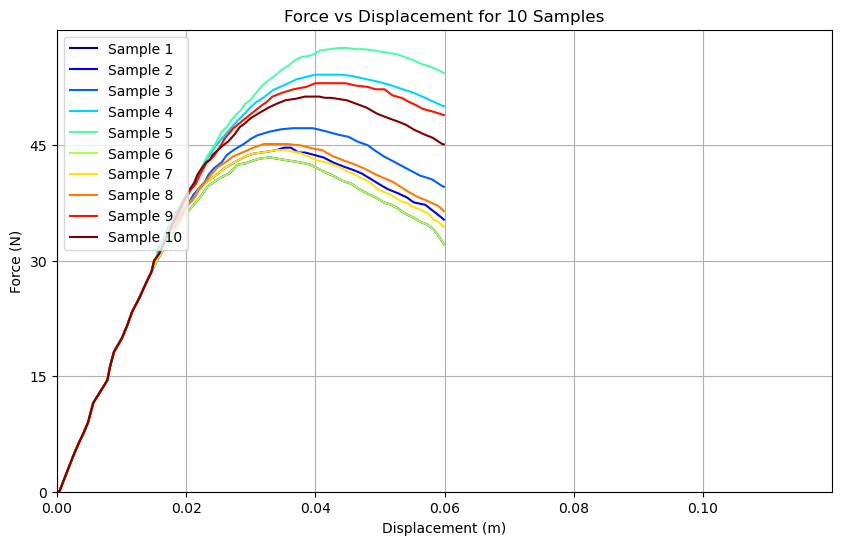

In [7]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# F vs U data of 10 samples after interpolation
samples_folder_path = 'D:\\1.sem7\\BTP S\\btp after msem\\data set rps\\train,test .samples\\*.csv'

# list to store all displacement and force data
X_all = []
colors = plt.cm.jet(np.linspace(0, 1, 10))  

plt.figure(figsize=(10, 6))
for i, file_path in enumerate(glob.glob(samples_folder_path)):
    data = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')

    displacement = data['Displacement'].values
    force = data['Force'].values
    plt.plot(displacement, force, color=colors[i], label=f'Sample {i+1}')

plt.xlim(0, 0.12)  
plt.ylim(0, 60)    
plt.xticks(np.arange(0, 0.12, 0.02))  
plt.yticks(np.arange(0, 60, 15))      


plt.title('Force vs Displacement for 10 Samples')
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.legend(loc='upper left')


plt.grid(True)
plt.show()


In [8]:
# Loading sample data ( f vs Disp) from the folder
samples_folder_path = 'D:\\1.sem7\\BTP S\\btp after msem\\data set rps\\train,test .samples\\*.csv'

X_all = []
Y_all = []

for file_path in glob.glob(samples_folder_path):
    data = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')
    # Combining force and displacement as input features
    X = data[['Displacement', 'Force']].values  
    sample_index = int(file_path.split('\\')[-1].split('.')[0].replace('sample', ''))
    print(f"File: {file_path}, Rows in X: {X.shape[0]}")

    Y = interfacial_params[sample_index - 1]
    Y_repeated = np.tile(Y, (X.shape[0], 1))  # Repeate Y for each displacement-force pair
    X_all.append(X)
    Y_all.append(Y_repeated)

X_all = np.vstack(X_all)
Y_all = np.vstack(Y_all)

print("First few rows of X_all (input features):")
print(X_all[:5])  

print("\nFirst few rows of Y_all (repeated interfacial parameters):")
print(Y_all[:5])  


File: D:\1.sem7\BTP S\btp after msem\data set rps\train,test .samples\1.csv, Rows in X: 600
File: D:\1.sem7\BTP S\btp after msem\data set rps\train,test .samples\10.csv, Rows in X: 600
File: D:\1.sem7\BTP S\btp after msem\data set rps\train,test .samples\2.csv, Rows in X: 600
File: D:\1.sem7\BTP S\btp after msem\data set rps\train,test .samples\3.csv, Rows in X: 600
File: D:\1.sem7\BTP S\btp after msem\data set rps\train,test .samples\4.csv, Rows in X: 600
File: D:\1.sem7\BTP S\btp after msem\data set rps\train,test .samples\5.csv, Rows in X: 600
File: D:\1.sem7\BTP S\btp after msem\data set rps\train,test .samples\6.csv, Rows in X: 600
File: D:\1.sem7\BTP S\btp after msem\data set rps\train,test .samples\7.csv, Rows in X: 600
File: D:\1.sem7\BTP S\btp after msem\data set rps\train,test .samples\8.csv, Rows in X: 600
File: D:\1.sem7\BTP S\btp after msem\data set rps\train,test .samples\9.csv, Rows in X: 600
First few rows of X_all (input features):
[[0.00000000e+00 0.00000000e+00]
 [1.

In [9]:
# Saving X_all and Y_all to a sheet

X_df = pd.DataFrame(X_all, columns=['Displacement', 'Force'])
X_df.to_csv('X_all.csv', index=False)

Y_df = pd.DataFrame(Y_all)  
Y_df.to_csv('Y_all.csv', index=False)

print("Files saved as X_all.csv and Y_all.csv.")

Files saved as X_all.csv and Y_all.csv.


In [10]:
print("Size of X_all (input features):", X_all.shape)
print("Size of Y_all (interfacial parameters):", Y_all.shape)

Size of X_all (input features): (6000, 2)
Size of Y_all (interfacial parameters): (6000, 7)


### Finding Optimal Sigma value/Smoothing factor (k)

Optimal Smoothing Factor (Sigma): 5.0


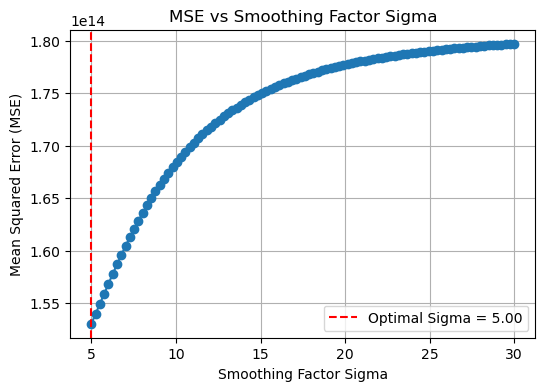

In [15]:
def evaluate_sigma(X, Y, sigma_values):
    mse_values = []
    n_samples = Y.shape[0] // 601 

    for sigma in sigma_values:
        model = GRNN(sigma)
        total_mse = 0
        
        for i in range(n_samples):
            # Leave-one-out cross-validation
            X_train = np.delete(X, np.s_[i * 601:(i + 1) * 601], axis=0)
            Y_train = np.delete(Y, np.s_[i * 601:(i + 1) * 601], axis=0)
            X_val = X[i * 601:(i + 1) * 601]
            Y_val = Y[i * 601:(i + 1) * 601]

            model.fit(X_train, Y_train)
            predicted = model.predict(X_val)
            total_mse += mean_squared_error(Y_val, predicted)
        
        avg_mse = total_mse / n_samples
        mse_values.append(avg_mse)

    return mse_values

sigma_values = np.linspace(5, 30, 100)  
mse_values = evaluate_sigma(X_all, Y_all, sigma_values)

# the optimal sigma
optimal_sigma_index = np.argmin(mse_values)
optimal_sigma = sigma_values[optimal_sigma_index]
print(f"Optimal Smoothing Factor (Sigma): {optimal_sigma}")

# MSE vs Sigma
plt.figure(figsize=(6, 4))
plt.plot(sigma_values, mse_values, marker='o')
plt.title('MSE vs Smoothing Factor Sigma')
plt.xlabel('Smoothing Factor Sigma')
plt.ylabel('Mean Squared Error (MSE)')
plt.axvline(optimal_sigma, color='r', linestyle='--', label=f'Optimal Sigma = {optimal_sigma:.2f}')
plt.legend()
plt.grid()
plt.show()

### Predicting New Parameters on the Test Data

In [12]:
# Load the new sample data (force vs. displacement data)
import pandas as pd
new_sample_file_path = 'D:\\1.sem7\BTP S\\btp after msem\\data set rps\\example\\fvs disp exampple data.csv'
new_sample_data = pd.read_csv(new_sample_file_path, encoding='utf-8')

new_input_values = new_sample_data[['Displacement', 'Force']].values

# Predicting the interfacial parameters using the trained GRNN model
grnn_model = GRNN(sigma=optimal_sigma)
grnn_model.fit(X_all, Y_all)
predicted_params = grnn_model.predict(new_input_values)

predictions_df = pd.DataFrame(predicted_params, columns=[f'Param_{i + 1}' for i in range(predicted_params.shape[1])])
predictions_df.to_csv('predicted_new_interfacial_parameters.csv', index=False)

print("Predicted interfacial parameters saved : predicted_new_interfacial_parameters.csv")


Predicted interfacial parameters saved : predicted_new_interfacial_parameters.csv


In [13]:
print(predictions_df[:2])  


   Param_1  Param_2  Param_3  Param_4       Param_5       Param_6      Param_7
0    202.0   0.0288    0.096     95.0  1.425000e+08  1.350000e+08  100000000.0
1    202.0   0.0288    0.096     95.0  1.425000e+08  1.350000e+08  100000000.0


### Finding Deviations , comparing with Experimental values

In [14]:
# Experimental values provided
experimental_values = np.array([200, 0.030, 0.10, 100.00, 1.50e8, 1.50e8])

# average of the predicted interfacial parameters across all predicted samples
average_predicted_params = np.mean(predicted_params, axis=0)

#  first 6 parameters as per the experimental values )
average_predicted_params = average_predicted_params[:6]

parameter_names = [
    " 1 (Tnmax)", 
    " 2 (G1c)", 
    " 3 (G2c)", 
    " 4 (Tsmax)", 
    " 5 (Knn)", 
    " 6 (Kss)"
]

#  the percentage deviations for each parameter
deviations = np.abs((average_predicted_params - experimental_values) / experimental_values) * 100

mean_deviation = np.mean(deviations)

print("Average Predicted Interfacial Parameters:")
for i, (name, param) in enumerate(zip(parameter_names, average_predicted_params)):
    if i < 4:
        print(f"{name}: {param:.5f}")  
    else:
        print(f"{name}: {param:.2e}")  

print("\nDeviations (%) for each parameter:")
for name, dev in zip(parameter_names, deviations):
    print(f"{name}: {dev:.2f}%")

print(f"\nMean Deviation (%): {mean_deviation:.2f}%")


Average Predicted Interfacial Parameters:
 1 (Tnmax): 201.87616
 2 (G1c): 0.02891
 3 (G2c): 0.09665
 4 (Tsmax): 97.00866
 5 (Knn): 1.42e+08
 6 (Kss): 1.36e+08

Deviations (%) for each parameter:
 1 (Tnmax): 0.94%
 2 (G1c): 3.63%
 3 (G2c): 3.35%
 4 (Tsmax): 2.99%
 5 (Knn): 5.07%
 6 (Kss): 9.37%

Mean Deviation (%): 4.23%
